In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gold-and-nifty50-20002020/Gold.csv
/kaggle/input/gold-and-nifty50-20002020/Nifty.csv


In [2]:
#pip install pmdarima

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 10,6

G = pd.read_csv("/kaggle/input/gold-and-nifty50-20002020/Gold.csv")
G["Date"] = pd.to_datetime(G["Date"], infer_datetime_format=True)
iG = G.set_index(["Date"])
N = pd.read_csv("/kaggle/input/gold-and-nifty50-20002020/Nifty.csv")
N["Date"] = pd.to_datetime(N["Date"], infer_datetime_format=True)
iN = N.set_index(["Date"])

In [4]:
iN.head()

,Price
Date,
2000-01-31,1546.20
2000-02-29,1654.80
2000-03-31,1528.45
2000-04-28,1406.55
2000-05-31,1380.45


In [5]:
iN.shape

(263, 1)

In [6]:
iG.head()

,Price
Date,
2000-01-31,436.803799
2000-02-29,461.251271
2000-03-31,440.281956
2000-04-28,430.542352
2000-05-31,426.822702


In [7]:
iG.shape

(263, 1)

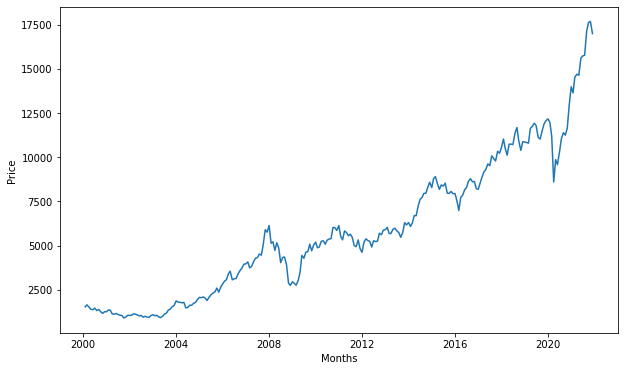

In [8]:
plt.xlabel("Months")
plt.ylabel("Price")
plt.plot(iN)

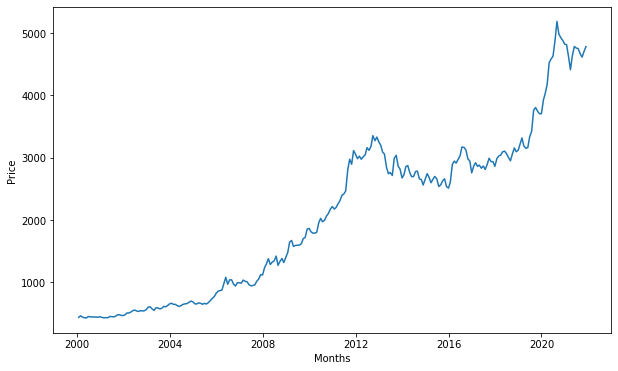

In [9]:
plt.xlabel("Months")
plt.ylabel("Price")
plt.plot(iG)

In [10]:
#Determine Rolling statistics

Grm = iG.rolling(window=12).mean()
Nrm = iN.rolling(window=12).mean()
Grs = iG.rolling(window=12).std()
Nrs = iN.rolling(window=12).std()
print("for gold : \t",Grm,Grs)
print("for NIFTY : \t",Nrm,Nrs)

for gold : 	                   Price
Date                   
2000-01-31          NaN
2000-02-29          NaN
2000-03-31          NaN
2000-04-28          NaN
2000-05-31          NaN
...                 ...
2021-07-30  4799.977728
2021-08-31  4756.816134
2021-09-30  4725.901928
2021-10-29  4707.070092
2021-11-30  4698.726571

[263 rows x 1 columns]                  Price
Date                  
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-28         NaN
2000-05-31         NaN
...                ...
2021-07-30  193.821138
2021-08-31  153.515977
2021-09-30  140.353808
2021-10-29  125.478921
2021-11-30  115.673920

[263 rows x 1 columns]
for NIFTY : 	                    Price
Date                    
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-28           NaN
2000-05-31           NaN
...                  ...
2021-07-30  13815.087500
2021-08-31  14293.812500
2021-09-30  14824.695833
2021-10-29  15327.133333
2021-11-30  15

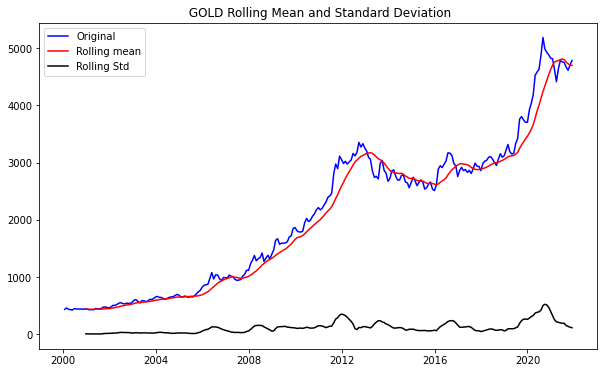

In [11]:
Original = plt.plot(iG, color="Blue", label="Original")
Mean = plt.plot(Grm, color="Red", label="Rolling mean")
std = plt.plot(Grs, color="Black", label="Rolling Std")
plt.legend(loc="best")
plt.title(" GOLD Rolling Mean and Standard Deviation")
plt.show(block=False)

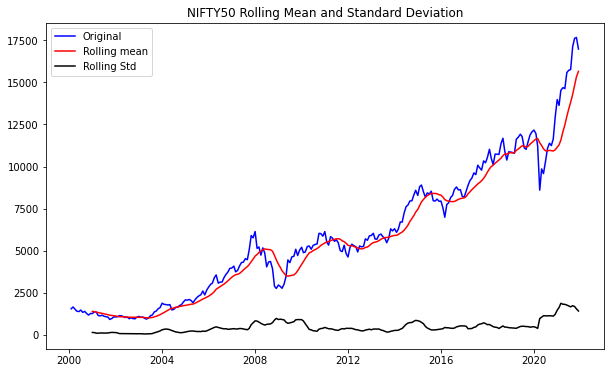

In [12]:
Original = plt.plot(iN, color="Blue", label="Original")
Mean = plt.plot(Nrm, color="Red", label="Rolling mean")
std = plt.plot(Nrs, color="Black", label="Rolling Std")
plt.legend(loc="best")
plt.title("NIFTY50 Rolling Mean and Standard Deviation")
plt.show(block=False)

Our data is not stationary from the above 2 graphs.

In [13]:
from statsmodels.tsa.stattools import adfuller 
#defining a function to test both rolling statistics and Dickey fuller test
def ad_test(dataset):
    print("Result of Dickey-Fuller Test :")
    dftest = adfuller(dataset, autolag= "AIC") #Akaike Information Criterion (AIC) or Bayesian Information Criteria (BIC) to determine how many lags to consider, as described in Comparing ARIMA Models. Thus we can now use the full version of the ADFTEST function which was introduced in Dickey-Fuller Test.
    dfval = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "No. of Lags used", "No. of observations used for ADF Regression and Critical values Calculation"])
    for key, val in dftest[4].items():
        dfval["Critical Value (%s)" %key] = val
    print(dfval) 
    
    print("To Determine Rolling Statistics")
    rm = dataset.rolling(window=12).mean()
    rs = dataset.rolling(window=12).std()
    
    #plot the rolling statistics
    o = plt.plot(dataset, color = "blue", label = "Original")
    m = plt.plot(rm, color = "red", label = "Rolling mean")
    s = plt.plot(rs, color = "Black", label = "Rolling Std. Dev.")
    plt.legend(loc="best")
    plt.show(block=False)

Result of Dickey-Fuller Test :
Test Statistic                                                                   0.605714
p-value                                                                          0.987756
No. of Lags used                                                                 2.000000
No. of observations used for ADF Regression and Critical values Calculation    260.000000
Critical Value (1%)                                                             -3.455754
Critical Value (5%)                                                             -2.872721
Critical Value (10%)                                                            -2.572728
dtype: float64
To Determine Rolling Statistics


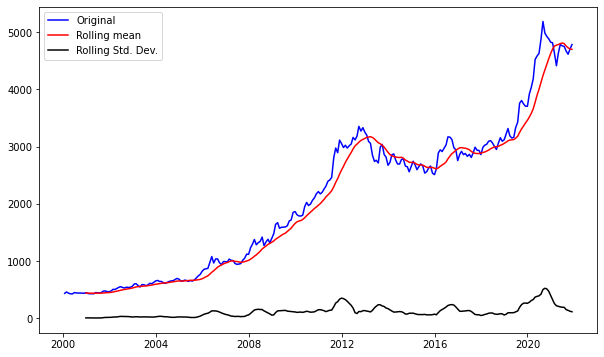

In [14]:
ad_test(iG)

Result of Dickey-Fuller Test :
Test Statistic                                                                   1.381933
p-value                                                                          0.997031
No. of Lags used                                                                 0.000000
No. of observations used for ADF Regression and Critical values Calculation    262.000000
Critical Value (1%)                                                             -3.455558
Critical Value (5%)                                                             -2.872636
Critical Value (10%)                                                            -2.572683
dtype: float64
To Determine Rolling Statistics


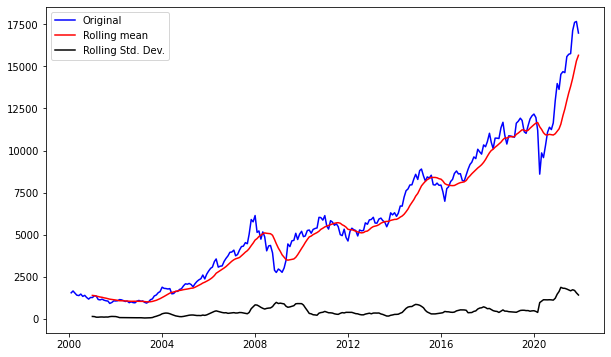

In [15]:
ad_test(iN)
#p-values < 0.05 Means dataset is stationary.
#critical value > test statistic

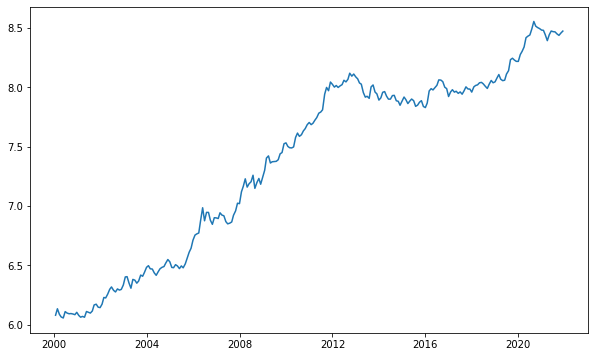

In [16]:
liG = np.log(iG)
plt.plot(liG)

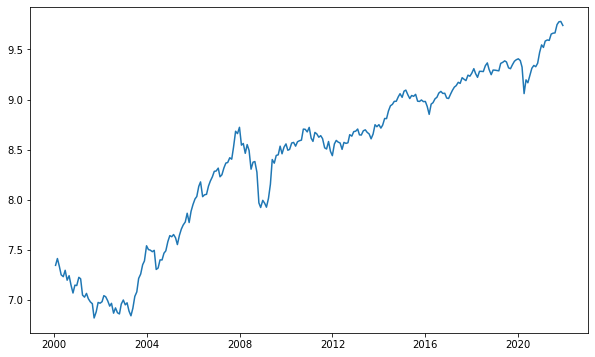

In [17]:
liN = np.log(iN)
plt.plot(liN)

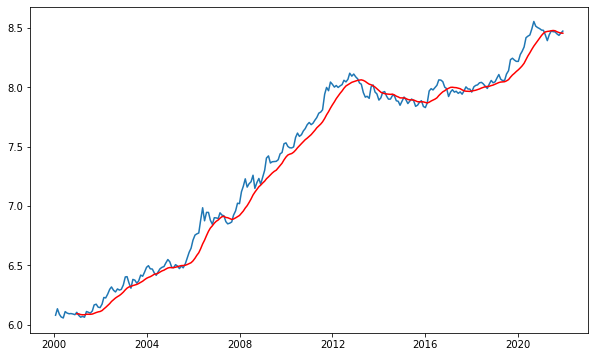

In [18]:
lGrm = liG.rolling(window=12).mean()
lGrs = liG.rolling(window=12).std()
plt.plot(liG)
plt.plot(lGrm, color="red")

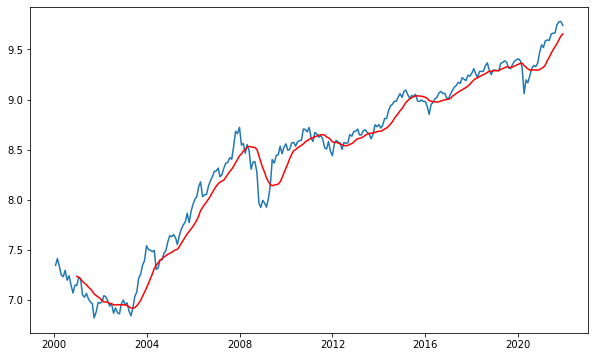

In [19]:
lNrm = liN.rolling(window=12).mean()
lNrs = liN.rolling(window=12).std()
plt.plot(liN)
plt.plot(lNrm, color="red")

In [20]:
aG = liG-lGrm
aG.head(12)

,Price
Date,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-28,NaN
2000-05-31,NaN
2000-06-30,NaN
2000-07-31,NaN
2000-08-31,NaN
2000-09-29,NaN


In [21]:
#remove NaN values
aG.dropna(inplace = True)
aG.head(10)

,Price
Date,
2000-12-29,0.012921
2001-01-31,-0.013895
2001-02-28,-0.021917
2001-03-30,-0.013969
2001-04-30,-0.020712
2001-05-31,0.023030
2001-06-29,0.017292
2001-07-31,0.010173
2001-08-31,0.026009


In [22]:
aN = liN-lNrm
aN.head(12)

,Price
Date,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-28,NaN
2000-05-31,NaN
2000-06-30,NaN
2000-07-31,NaN
2000-08-31,NaN
2000-09-29,NaN


In [23]:
#remove NaN values
aN.dropna(inplace = True)
aN.head(10)

,Price
Date,
2000-12-29,-0.091429
2001-01-31,0.000676
2001-02-28,0.002644
2001-03-30,-0.136463
2001-04-30,-0.138059
2001-05-31,-0.086923
2001-06-29,-0.116016
2001-07-31,-0.130080
2001-08-31,-0.124719


Result of Dickey-Fuller Test :
Test Statistic                                                                  -5.520313
p-value                                                                          0.000002
No. of Lags used                                                                 4.000000
No. of observations used for ADF Regression and Critical values Calculation    247.000000
Critical Value (1%)                                                             -3.457105
Critical Value (5%)                                                             -2.873314
Critical Value (10%)                                                            -2.573044
dtype: float64
To Determine Rolling Statistics


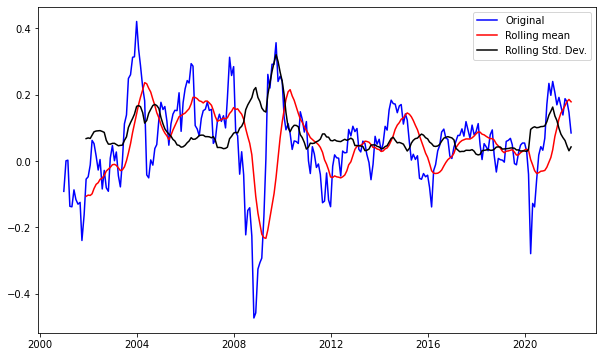

In [24]:
ad_test(aN)

Result of Dickey-Fuller Test :
Test Statistic                                                                  -4.506020
p-value                                                                          0.000192
No. of Lags used                                                                 1.000000
No. of observations used for ADF Regression and Critical values Calculation    250.000000
Critical Value (1%)                                                             -3.456781
Critical Value (5%)                                                             -2.873172
Critical Value (10%)                                                            -2.572969
dtype: float64
To Determine Rolling Statistics


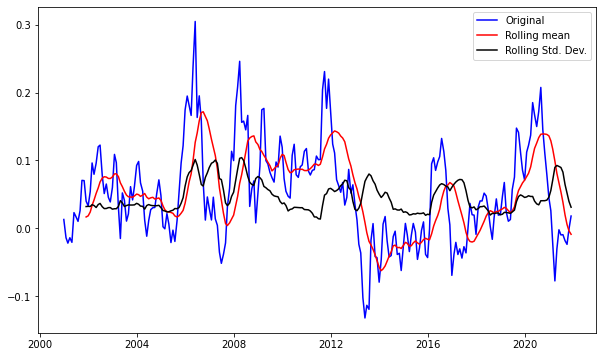

In [25]:
ad_test(aG)

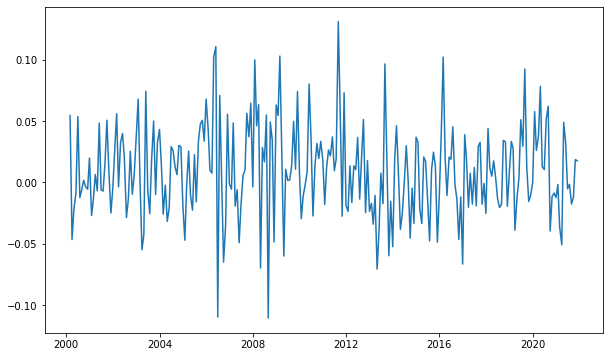

In [26]:
bG = liG - liG.shift()
plt.plot(bG)

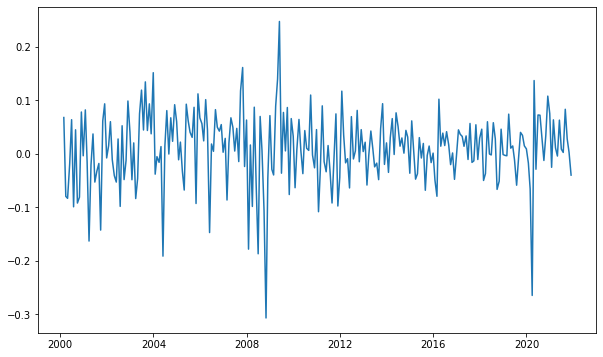

In [27]:
bN = liN - liN.shift()
plt.plot(bN)

In [28]:
bG.dropna(inplace=True)
bN.dropna(inplace=True)

Result of Dickey-Fuller Test :
Test Statistic                                                                -1.215184e+01
p-value                                                                        1.563820e-22
No. of Lags used                                                               1.000000e+00
No. of observations used for ADF Regression and Critical values Calculation    2.600000e+02
Critical Value (1%)                                                           -3.455754e+00
Critical Value (5%)                                                           -2.872721e+00
Critical Value (10%)                                                          -2.572728e+00
dtype: float64
To Determine Rolling Statistics


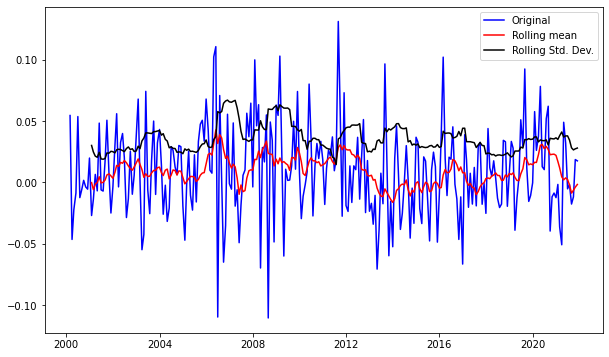

In [29]:
ad_test(bG)

Result of Dickey-Fuller Test :
Test Statistic                                                                -1.564842e+01
p-value                                                                        1.607727e-28
No. of Lags used                                                               0.000000e+00
No. of observations used for ADF Regression and Critical values Calculation    2.610000e+02
Critical Value (1%)                                                           -3.455656e+00
Critical Value (5%)                                                           -2.872678e+00
Critical Value (10%)                                                          -2.572705e+00
dtype: float64
To Determine Rolling Statistics


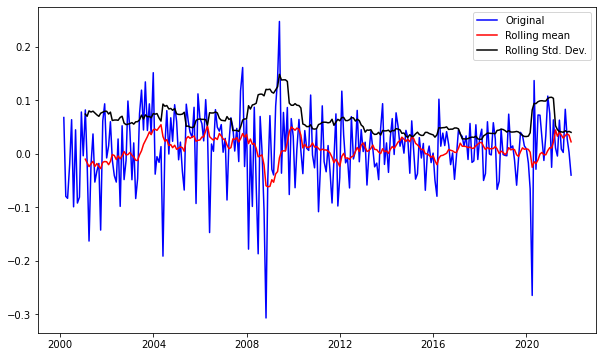

In [30]:
ad_test(bN)

Result of Dickey-Fuller Test :
Test Statistic                                                                -9.471680e+00
p-value                                                                        4.090299e-16
No. of Lags used                                                               4.000000e+00
No. of observations used for ADF Regression and Critical values Calculation    2.460000e+02
Critical Value (1%)                                                           -3.457215e+00
Critical Value (5%)                                                           -2.873362e+00
Critical Value (10%)                                                          -2.573070e+00
dtype: float64
To Determine Rolling Statistics


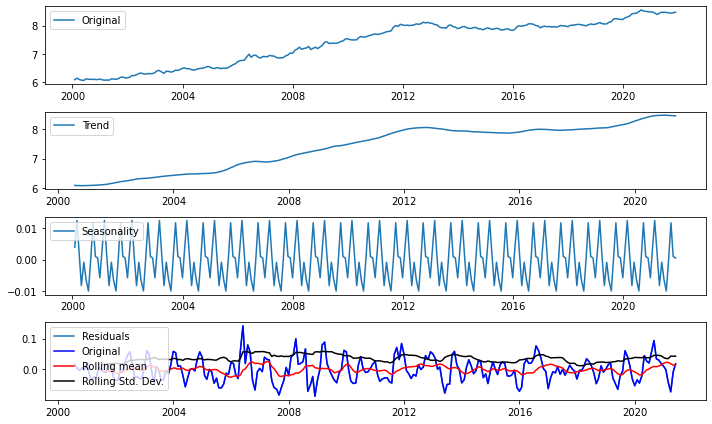

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(liG, period=12)

G_trend = decomposition.trend
G_seasonal = decomposition.seasonal
G_residual = decomposition.resid

plt.subplot(411)
plt.plot(liG, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(G_trend, label = "Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(G_seasonal, label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(G_residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()

dldG = G_residual
dldG.dropna(inplace=True)
ad_test(dldG)

Result of Dickey-Fuller Test :
Test Statistic                                                                -6.985378e+00
p-value                                                                        7.993958e-10
No. of Lags used                                                               1.000000e+01
No. of observations used for ADF Regression and Critical values Calculation    2.400000e+02
Critical Value (1%)                                                           -3.457894e+00
Critical Value (5%)                                                           -2.873659e+00
Critical Value (10%)                                                          -2.573229e+00
dtype: float64
To Determine Rolling Statistics


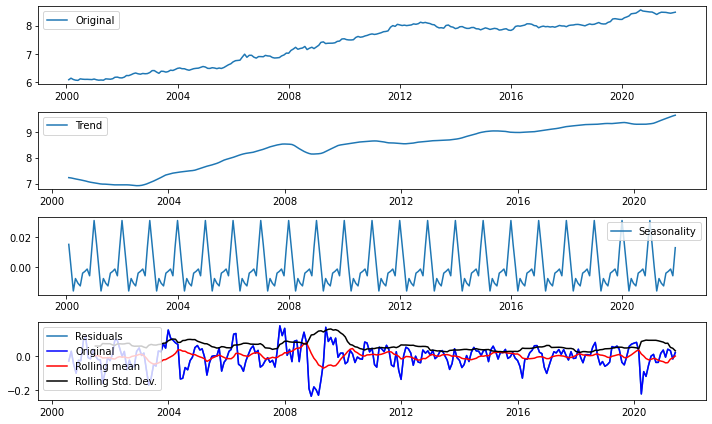

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(liN, period=12)

N_trend = decomposition.trend
N_seasonal = decomposition.seasonal
N_residual = decomposition.resid

plt.subplot(411)
plt.plot(liG, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(N_trend, label = "Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(N_seasonal, label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(N_residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()

dldN = N_residual
dldN.dropna(inplace=True)
ad_test(dldN)

Result of Dickey-Fuller Test :
Test Statistic                                                                -9.471680e+00
p-value                                                                        4.090299e-16
No. of Lags used                                                               4.000000e+00
No. of observations used for ADF Regression and Critical values Calculation    2.460000e+02
Critical Value (1%)                                                           -3.457215e+00
Critical Value (5%)                                                           -2.873362e+00
Critical Value (10%)                                                          -2.573070e+00
dtype: float64
To Determine Rolling Statistics


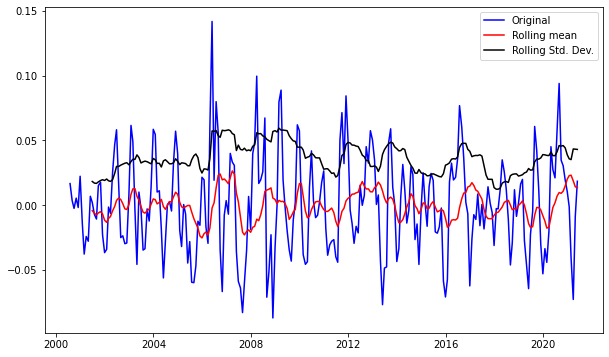

In [33]:
rG = G_residual
rG.dropna(inplace=True)
ad_test(rG)

Result of Dickey-Fuller Test :
Test Statistic                                                                -6.985378e+00
p-value                                                                        7.993958e-10
No. of Lags used                                                               1.000000e+01
No. of observations used for ADF Regression and Critical values Calculation    2.400000e+02
Critical Value (1%)                                                           -3.457894e+00
Critical Value (5%)                                                           -2.873659e+00
Critical Value (10%)                                                          -2.573229e+00
dtype: float64
To Determine Rolling Statistics


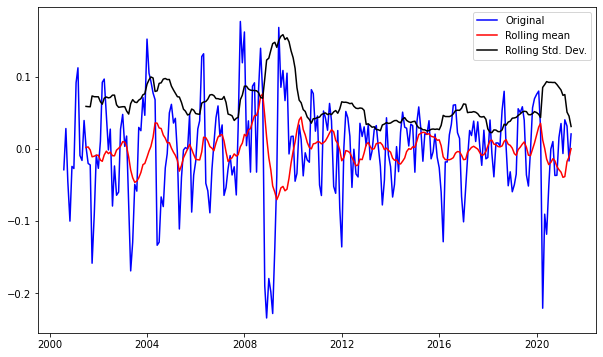

In [34]:
rN = N_residual
rN.dropna(inplace=True)
ad_test(rN)

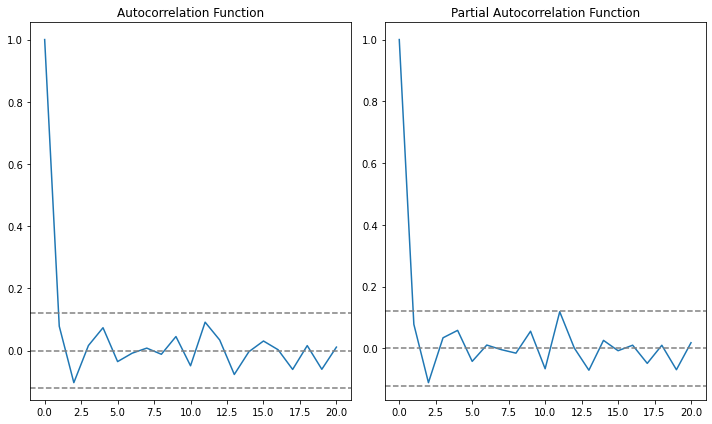

In [35]:
from statsmodels.tsa.stattools import acf,pacf

G_lag_acf = acf(bG, nlags=20, fft=False)
G_lag_pacf = pacf(bG, nlags=20, method="ols")#ordinary least square method

#plot ACF: #value of q
plt.subplot(121)
plt.plot(G_lag_acf)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(bG)),linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(bG)),linestyle="--", color="gray")
plt.title("Autocorrelation Function")

#plot PACF #value of p
plt.subplot(122)
plt.plot(G_lag_pacf)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(bG)),linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(bG)),linestyle="--", color="gray")
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

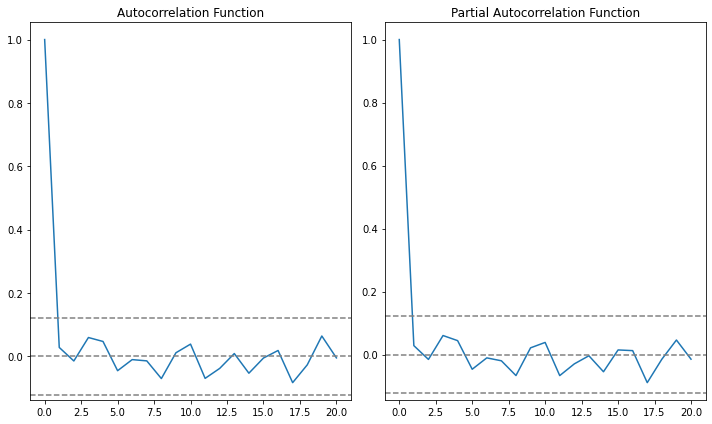

In [36]:
from statsmodels.tsa.stattools import acf,pacf

N_lag_acf = acf(bN, nlags=20, fft=False)
N_lag_pacf = pacf(bN, nlags=20, method="ols")#ordinary least square method

#plot ACF: #value of q
plt.subplot(121)
plt.plot(N_lag_acf)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(bN)),linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(bN)),linestyle="--", color="gray")
plt.title("Autocorrelation Function")

#plot PACF #value of p
plt.subplot(122)
plt.plot(N_lag_pacf)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(bN)),linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(bN)),linestyle="--", color="gray")
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [37]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 273 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [38]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [39]:
#to know the best order
G_of = auto_arima(bG, trace = True, suppress_warnings=True)
G_of.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-977.953, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-979.775, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-979.381, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-979.830, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-966.287, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-979.236, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-980.404, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-978.391, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-978.407, Time=0.52 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-976.407, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-968.010, Time=0.13 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.741 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  262
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 494.202
Date:                Tue, 11 Jan 2022   AIC                           -980.404
Time:                        18:43:14   BIC                           -966.130
Sample:                             0   HQIC                          -974.667
                                - 262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.002      3.846      0.000       0.004       0.014
ma.L1          0.0900      0.054      1.661      0.097      -0.016       0.196
ma.L2         -0.0919      0.054     -1.706      0.088      -0.197       0.014
sigma2         0.0013      0.000     13.231      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.16
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               0.77   Skew:                             0.21
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
#to know the best order
N_of = auto_arima(bN, trace = True, suppress_warnings=True)
N_of.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-664.394, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-672.024, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-670.236, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-670.243, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-669.128, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-668.394, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.952 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  262
Model:                        SARIMAX   Log Likelihood                 338.012
Date:                Tue, 11 Jan 2022   AIC                           -672.024
Time:                        18:43:15   BIC                           -664.887
Sample:                             0   HQIC                          -669.155
                                - 262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.004      2.085      0.037       0.001       0.018
sigma2         0.0044      0.000     16.987      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               125.20
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  262
Model:                     ARMA(0, 2)   Log Likelihood                 494.202
Method:                       css-mle   S.D. of innovations              0.037
Date:                Tue, 11 Jan 2022   AIC                           -980.404
Time:                        18:43:15   BIC                           -966.130
Sample:                    02-29-2000   HQIC                          -974.667
                         - 11-30-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0092      0.002      4.048      0.000       0.005       0.014
ma.L1.Price     0.0896      0.061      1.464      0.143      -0.030       0.210
ma.L2.Price    -0.0927      0.058     -1.610    

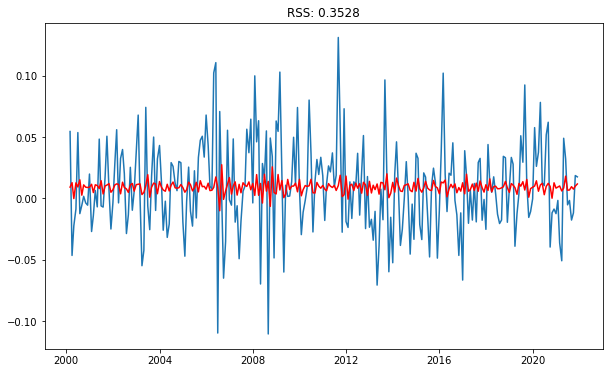

In [41]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
G_model = ARIMA(bG, order=(0,0,2))
G_results_AR = G_model.fit(disp=-1)
print(G_results_AR.summary())
plt.plot(bG)
plt.plot(G_results_AR.fittedvalues, color="red")
plt.title("RSS: %.4f"% sum((G_results_AR.fittedvalues-bG["Price"])**2))
print("Plotting AR model")

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  262
Model:                     ARMA(0, 0)   Log Likelihood                 338.012
Method:                           css   S.D. of innovations              0.067
Date:                Tue, 11 Jan 2022   AIC                           -672.024
Time:                        18:43:16   BIC                           -664.887
Sample:                    02-29-2000   HQIC                          -669.155
                         - 11-30-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.004      2.223      0.026       0.001       0.017
Plotting AR model


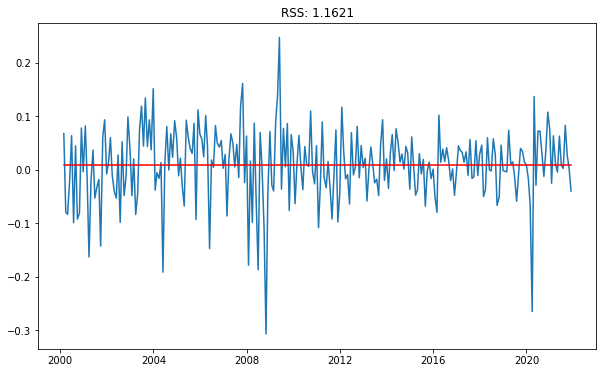

In [42]:
#AR model
N_model = ARIMA(bN, order=(0,0,0))
N_results_AR = N_model.fit(disp=-1)
print(N_results_AR.summary())
plt.plot(bN)
plt.plot(N_results_AR.fittedvalues, color="red")
plt.title("RSS: %.4f"% sum((N_results_AR.fittedvalues-bN["Price"])**2))
print("Plotting AR model")